In [1]:
import pandas as pd
from Bio import SeqIO
import seaborn as sns
import numpy as np

In [2]:
blast = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/hs_blast/out/A1BG_9606.out', sep='\t', header=None)
blast.columns = ["query", "subject", "identity", "alignment_length", "mismatches", "gap_opens","q_start", "q_end", "s_start", "s_end", "evalue", "bit_score"]
mask = blast['query'] == blast['subject']
blast = blast[~mask] 
blast['query_species'] = blast['query'].apply(lambda x: x.split('_')[-1])
blast['subject_species'] = blast['subject'].apply(lambda x: x.split('_')[-1])
blast['gene'] = blast['query'].apply(lambda x: x.split('_')[0])+'_'+blast['query'].apply(lambda x: x.split('_')[-1])

exon_length = {}
with open("/home/collot/stage/collot/collot/out_ortho/fasta_homo_sapiens/A1BG_9606.fasta", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
        exon = record.description
        exon_length[exon]=len(record.seq)
query_length = []
for e in blast['query'].values:
    if e in exon_length:
        query_length.append(exon_length[e])
subject_length = []
for e in blast['subject'].values:
    if e in exon_length:
        subject_length.append(exon_length[e])

blast['query_length']=query_length
blast['subject_length']=subject_length
blast['query_coverage']= (blast['alignment_length']/blast['query_length'])*100

print(blast)

                           query                        subject  identity  \
1        A1BG_NM_130786.4-8_9606    A1BG_XM_030819447.1-7_61853    97.059   
2        A1BG_NM_130786.4-8_9606     A1BG_XM_001146669.7-8_9598    99.432   
3        A1BG_NM_130786.4-8_9606     A1BG_XM_055103953.3-8_9597    99.432   
4        A1BG_NM_130786.4-8_9606     A1BG_XM_031004187.3-8_9595    98.864   
5        A1BG_NM_130786.4-8_9606     A1BG_XM_055239924.2-8_9590    98.295   
...                          ...                            ...       ...   
4788  A1BG_XM_001146669.7-1_9598        A1BG_NM_130786.4-1_9606   100.000   
4789  A1BG_XM_001146669.7-1_9598     A1BG_XM_054464970.2-1_9600    95.556   
4790  A1BG_XM_001146669.7-1_9598     A1BG_XM_055239924.2-1_9590    95.556   
4791  A1BG_XM_001146669.7-1_9598  A1BG_XM_017509623.2-1_2715852    90.099   
4792  A1BG_XM_001146669.7-1_9598     A1BG_XM_031004187.3-1_9595    98.214   

      alignment_length  mismatches  gap_opens  q_start  q_end  s_start  s_e

In [3]:
#insertions 
blast_no_diplicates = blast.drop_duplicates(subset=['query', 'subject'])
print(blast_no_diplicates)

                           query                        subject  identity  \
1        A1BG_NM_130786.4-8_9606    A1BG_XM_030819447.1-7_61853    97.059   
2        A1BG_NM_130786.4-8_9606     A1BG_XM_001146669.7-8_9598    99.432   
3        A1BG_NM_130786.4-8_9606     A1BG_XM_055103953.3-8_9597    99.432   
4        A1BG_NM_130786.4-8_9606     A1BG_XM_031004187.3-8_9595    98.864   
5        A1BG_NM_130786.4-8_9606     A1BG_XM_055239924.2-8_9590    98.295   
...                          ...                            ...       ...   
4788  A1BG_XM_001146669.7-1_9598        A1BG_NM_130786.4-1_9606   100.000   
4789  A1BG_XM_001146669.7-1_9598     A1BG_XM_054464970.2-1_9600    95.556   
4790  A1BG_XM_001146669.7-1_9598     A1BG_XM_055239924.2-1_9590    95.556   
4791  A1BG_XM_001146669.7-1_9598  A1BG_XM_017509623.2-1_2715852    90.099   
4792  A1BG_XM_001146669.7-1_9598     A1BG_XM_031004187.3-1_9595    98.214   

      alignment_length  mismatches  gap_opens  q_start  q_end  s_start  s_e

In [4]:


def check_duplicates(blast, species_column,check_column):
    duplicates = []
    for s in blast[species_column].unique():  
        dup = blast[blast[species_column] == s]
        dup = dup.sort_values(by=[check_column])
        if dup.duplicated(subset=check_column).sum() > 0:
            duplicates.append(dup[dup.duplicated(subset=check_column, keep=False)])
    return pd.concat(duplicates)
df_one_to_many = pd.DataFrame()
df_many_to_one = pd.DataFrame()
df_one_to_many = pd.concat([df_one_to_many, check_duplicates(blast_no_diplicates, species_column='subject_species', check_column='query')])
df_many_to_one = pd.concat([df_many_to_one, check_duplicates(blast_no_diplicates, species_column='query_species', check_column='subject')])
print(df_one_to_many)

                            query                      subject  identity  \
3773   A1BG_XM_011969089.1-7_9568  A1BG_XM_030819447.1-6_61853    92.708   
3783   A1BG_XM_011969089.1-7_9568  A1BG_XM_030819447.1-7_61853    91.855   
3281   A1BG_XM_025368888.1-8_9565  A1BG_XM_030819447.1-6_61853    93.056   
3287   A1BG_XM_025368888.1-8_9565  A1BG_XM_030819447.1-7_61853    92.760   
1488  A1BG_XM_038006460.1-5_60711  A1BG_XM_030819447.1-6_61853    93.056   
...                           ...                          ...       ...   
3768   A1BG_XM_011969089.1-7_9568      A1BG_NM_130786.4-7_9606    93.750   
3292   A1BG_XM_025368888.1-8_9565      A1BG_NM_130786.4-8_9606    91.441   
3275   A1BG_XM_025368888.1-8_9565      A1BG_NM_130786.4-7_9606    94.097   
1485  A1BG_XM_038006460.1-5_60711      A1BG_NM_130786.4-7_9606    93.403   
1508  A1BG_XM_038006460.1-5_60711      A1BG_NM_130786.4-8_9606    92.405   

      alignment_length  mismatches  gap_opens  q_start  q_end  s_start  s_end  \
3773  

In [5]:
exons=[]
for index, row in blast.iterrows():
    exon_row=[]
    exon_row.append(row['query'])
    exon_row.append(row['subject'])
    if row['query'] in df_one_to_many['query'].values : #fusion(one big exon agains two small)
        exon_row.append("fusion")
    elif row['query'] in df_many_to_one['query'].values : #fission
        exon_row.append("fission")
    else : 
        exon_row.append("whole")
    exon_row.append(row['query_coverage'])
    exon_row.append(row['gene'])
    exon_row.append(row['query_species'])
    exons.append(exon_row)
df_changes = pd.DataFrame(exons, columns=['query','subject','state','query_coverage', 'gene', 'species'])
print(df_changes)

                           query                        subject    state  \
0        A1BG_NM_130786.4-8_9606    A1BG_XM_030819447.1-7_61853  fission   
1        A1BG_NM_130786.4-8_9606     A1BG_XM_001146669.7-8_9598  fission   
2        A1BG_NM_130786.4-8_9606     A1BG_XM_055103953.3-8_9597  fission   
3        A1BG_NM_130786.4-8_9606     A1BG_XM_031004187.3-8_9595  fission   
4        A1BG_NM_130786.4-8_9606     A1BG_XM_055239924.2-8_9590  fission   
...                          ...                            ...      ...   
4531  A1BG_XM_001146669.7-1_9598        A1BG_NM_130786.4-1_9606    whole   
4532  A1BG_XM_001146669.7-1_9598     A1BG_XM_054464970.2-1_9600    whole   
4533  A1BG_XM_001146669.7-1_9598     A1BG_XM_055239924.2-1_9590    whole   
4534  A1BG_XM_001146669.7-1_9598  A1BG_XM_017509623.2-1_2715852    whole   
4535  A1BG_XM_001146669.7-1_9598     A1BG_XM_031004187.3-1_9595    whole   

      query_coverage       gene species  
0          64.428803  A1BG_9606    9606  
1  

<Axes: xlabel='query_coverage', ylabel='Count'>

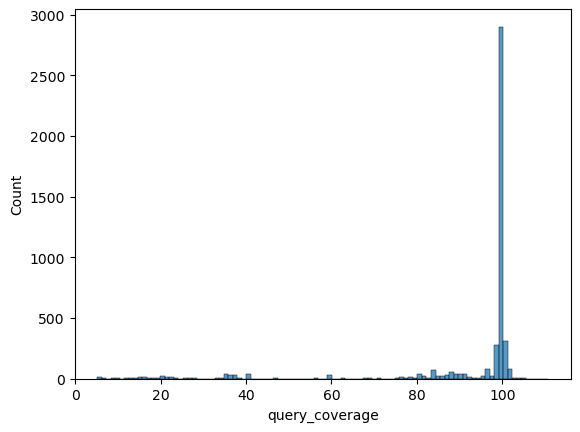

In [6]:
sns.histplot(df_changes['query_coverage'], bins=100)

In [7]:
#reciprocal hits, en premier 
reciprocal_hits=[]
for index, row in blast.iterrows():
    que = row['query']
    sub = row['subject']
    if que in blast['subject'].values:
        match = blast[blast['subject']==que]
        if sub in match['query'].values:
            reciprocal_hits.append(row)
df_reci= pd.DataFrame(reciprocal_hits)
print(df_reci)
if len(df_reci)==len(blast):
    print("all hits are reciprocal")

                           query                        subject  identity  \
1        A1BG_NM_130786.4-8_9606    A1BG_XM_030819447.1-7_61853    97.059   
2        A1BG_NM_130786.4-8_9606     A1BG_XM_001146669.7-8_9598    99.432   
3        A1BG_NM_130786.4-8_9606     A1BG_XM_055103953.3-8_9597    99.432   
4        A1BG_NM_130786.4-8_9606     A1BG_XM_031004187.3-8_9595    98.864   
5        A1BG_NM_130786.4-8_9606     A1BG_XM_055239924.2-8_9590    98.295   
...                          ...                            ...       ...   
4788  A1BG_XM_001146669.7-1_9598        A1BG_NM_130786.4-1_9606   100.000   
4789  A1BG_XM_001146669.7-1_9598     A1BG_XM_054464970.2-1_9600    95.556   
4790  A1BG_XM_001146669.7-1_9598     A1BG_XM_055239924.2-1_9590    95.556   
4791  A1BG_XM_001146669.7-1_9598  A1BG_XM_017509623.2-1_2715852    90.099   
4792  A1BG_XM_001146669.7-1_9598     A1BG_XM_031004187.3-1_9595    98.214   

      alignment_length  mismatches  gap_opens  q_start  q_end  s_start  s_e

In [8]:
print(df_changes)

                           query                        subject    state  \
0        A1BG_NM_130786.4-8_9606    A1BG_XM_030819447.1-7_61853  fission   
1        A1BG_NM_130786.4-8_9606     A1BG_XM_001146669.7-8_9598  fission   
2        A1BG_NM_130786.4-8_9606     A1BG_XM_055103953.3-8_9597  fission   
3        A1BG_NM_130786.4-8_9606     A1BG_XM_031004187.3-8_9595  fission   
4        A1BG_NM_130786.4-8_9606     A1BG_XM_055239924.2-8_9590  fission   
...                          ...                            ...      ...   
4531  A1BG_XM_001146669.7-1_9598        A1BG_NM_130786.4-1_9606    whole   
4532  A1BG_XM_001146669.7-1_9598     A1BG_XM_054464970.2-1_9600    whole   
4533  A1BG_XM_001146669.7-1_9598     A1BG_XM_055239924.2-1_9590    whole   
4534  A1BG_XM_001146669.7-1_9598  A1BG_XM_017509623.2-1_2715852    whole   
4535  A1BG_XM_001146669.7-1_9598     A1BG_XM_031004187.3-1_9595    whole   

      query_coverage       gene species  
0          64.428803  A1BG_9606    9606  
1  

In [9]:
exons_list=[]
for e in df_changes['query'].unique():
    row=[]
    df_one_gene = df_changes[df_changes['query']==e]
    row.append(e)
    row.append(df_changes.loc[df_changes['query']==e,'gene'].iloc[0])
    row.append(df_changes.loc[df_changes['query']==e,'state'].iloc[0])
    row.append(len(df_changes.loc[df_changes['query']==e,'gene']))
    row.append(np.mean(df_changes.loc[df_changes['query']==e,'query_coverage']))
    exons_list.append(row)
df_genes= pd.DataFrame(exons_list, columns=['exon', 'gene', 'change', 'nb_hit', 'average coverage (%)'])
print(df_genes)

                           exon       gene   change  nb_hit  \
0       A1BG_NM_130786.4-8_9606  A1BG_9606  fission      15   
1       A1BG_NM_130786.4-7_9606  A1BG_9606  fission      28   
2       A1BG_NM_130786.4-6_9606  A1BG_9606    whole      32   
3       A1BG_NM_130786.4-5_9606  A1BG_9606    whole      26   
4       A1BG_NM_130786.4-4_9606  A1BG_9606    whole      19   
..                          ...        ...      ...     ...   
240  A1BG_XM_001146669.7-5_9598  A1BG_9598    whole      27   
241  A1BG_XM_001146669.7-4_9598  A1BG_9598    whole      26   
242  A1BG_XM_001146669.7-3_9598  A1BG_9598    whole      28   
243  A1BG_XM_001146669.7-2_9598  A1BG_9598    whole       4   
244  A1BG_XM_001146669.7-1_9598  A1BG_9598    whole       5   

     average coverage (%)  
0               13.445226  
1              100.148810  
2               84.120124  
3               99.844600  
4               99.826489  
..                    ...  
240             99.812944  
241             99.

In [10]:
"""#get recirpocal best hits
best_hit=[]
for gene in blast['query'].unique() :
    df_gene = blast[blast['query']==gene]
    best_hit.append(df_gene.iloc[0])
best_df = pd.DataFrame(best_hit)
reci=[]
for index, row in best_df.iterrows():
    que = row['query']
    sub = row['subject']
    if que in best_df['subject'].values:
        match = best_df[best_df['subject']==que]
        if sub in match['query'].values:
            reci.append(row)
reci_best_hit = pd.DataFrame(reci)
print(reci_best_hit)
exons_list = []
length_list = []

with open("/home/collot/stage/collot/collot/out_ortho/fasta_homo_sapiens/A1BG_9606.fasta", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
        exons_list.append(record.description)
        length_list.append(len(record.seq))

ali_length = []
orthologs = []
q_start = []
q_end = []
s_start = []
s_end = []
coverage = []
for exons in exons_list:
    if exons in reci_best_hit['query'].values:
        orthologs.append(reci_best_hit.loc[reci_best_hit['query']==exons, 'subject'].iloc[0])
        q_start.append(reci_best_hit.loc[reci_best_hit['query']==exons, 'q_start'].iloc[0])
        q_end.append(reci_best_hit.loc[reci_best_hit['query']==exons, 'q_end'].iloc[0])
        s_start.append(reci_best_hit.loc[reci_best_hit['query']==exons, 's_start'].iloc[0])
        s_end.append(reci_best_hit.loc[reci_best_hit['query']==exons, 's_end'].iloc[0])
        ali_length.append(reci_best_hit.loc[reci_best_hit['query']==exons, 'alignment_length'].iloc[0])
    elif exons in reci_best_hit['subject'].values:
        orthologs.append(reci_best_hit.loc[reci_best_hit['subject']==exons, 'query'].iloc[0])
        q_start.append(reci_best_hit.loc[reci_best_hit['subject']==exons, 'q_start'].iloc[0])
        q_end.append(reci_best_hit.loc[reci_best_hit['subject']==exons, 'q_end'].iloc[0])
        s_start.append(reci_best_hit.loc[reci_best_hit['subject']==exons, 's_start'].iloc[0])
        s_end.append(reci_best_hit.loc[reci_best_hit['subject']==exons, 's_end'].iloc[0])
        ali_length.append(reci_best_hit.loc[reci_best_hit['subject']==exons, 'alignment_length'].iloc[0])
    else:
        orthologs.append(None)
        q_start.append(0)
        q_end.append(0)
        s_start.append(0)
        s_end.append(0)
        ali_length.append(0)

df_all_exons = pd.DataFrame(list(zip(exons_list,length_list,ali_length, orthologs, q_start, q_end, s_start, s_end)), columns=['query_exons','query_length','alignment_length', 'best_hit','q_start', 'q_end', 's_start', 's_end' ])
df_all_exons['coverage']=(df_all_exons['alignment_length']/df_all_exons['query_length'])*100

for index, row in df_all_exons.iterrows():
    best_hit = row['best_hit']
    if best_hit is not None:

        match = df_all_exons.loc[df_all_exons['query_exons'] == best_hit, 'query_length']
        if not match.empty:
            df_all_exons.at[index, 'best_hit_length'] = match.iloc[0]
    else:
        df_all_exons.at[index, 'best_hit_length'] = None

print(df_all_exons)"""

'#get recirpocal best hits\nbest_hit=[]\nfor gene in blast[\'query\'].unique() :\n    df_gene = blast[blast[\'query\']==gene]\n    best_hit.append(df_gene.iloc[0])\nbest_df = pd.DataFrame(best_hit)\nreci=[]\nfor index, row in best_df.iterrows():\n    que = row[\'query\']\n    sub = row[\'subject\']\n    if que in best_df[\'subject\'].values:\n        match = best_df[best_df[\'subject\']==que]\n        if sub in match[\'query\'].values:\n            reci.append(row)\nreci_best_hit = pd.DataFrame(reci)\nprint(reci_best_hit)\nexons_list = []\nlength_list = []\n\nwith open("/home/collot/stage/collot/collot/out_ortho/fasta_homo_sapiens/A1BG_9606.fasta", "r") as f:\n    for record in SeqIO.parse(f, "fasta"):\n        exons_list.append(record.description)\n        length_list.append(len(record.seq))\n\nali_length = []\northologs = []\nq_start = []\nq_end = []\ns_start = []\ns_end = []\ncoverage = []\nfor exons in exons_list:\n    if exons in reci_best_hit[\'query\'].values:\n        orthologs